In [2]:
import tensorflow as tf 
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices() )



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 908306260386832492
xla_global_id: -1
]


In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


In [5]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
import sys

for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d\t'%i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	13	73	0	0	1	4	0	0	0	0	1	1	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	0	36	136	127	62	54	0	0	0	1	3	4	0	0	3	
0	0	0	0	0	0	0	0	0	0	0	0	6	0	102	204	176	134	144	123	23	0	0	0	0	12	10	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	155	236	207	178	107	156	161	109	64	23	77	130	72	15	
0	0	0	0	0	0	0	0	0	0	0	1	0	69	207	223	218	216	216	163	127	121	122	146	141	88	172	66	
0	0	0	0	0	0	0	0	0	1	1	1	0	200	232	232	233	229	223	223	215	213	164	127	123	196	229	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	183	225	216	223	228	235	227	224	222	224	221	223	245	173	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	193	228	218	213	198	180	212	210	211	213	223	220	243	202	0	
0	0	0	0	0	0	0	0	0	1	3	0	12	219	220	212	218	192	169	227	208	218	224	212	226	197	209	52	
0	0	0	0	0	0	0	0	0	0	6	0	99	244	222	220	218	203	198	221	215	213	222	220	245	119	167	56	
0	0	0	0	0	0	0	0	0	4	0	0	55	236	228	230	22

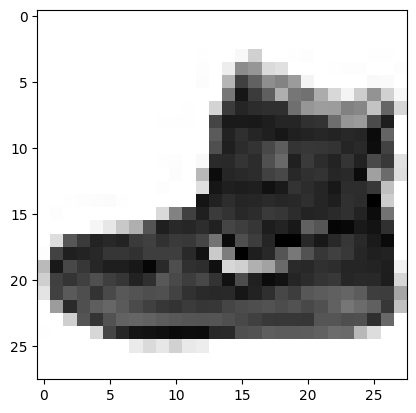

In [7]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [8]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [11]:
import tensorflow as tf
import datetime

In [13]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [14]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])



Epoch 1/5


1875/1875 [==============================] - 16s 8ms/step - loss: 3.8496 - accuracy: 0.6738 - val_loss: 0.8266 - val_accuracy: 0.6992
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7338 - accuracy: 0.7263 - val_loss: 0.7143 - val_accuracy: 0.7608
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6340 - accuracy: 0.7710 - val_loss: 0.5947 - val_accuracy: 0.8040
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5635 - accuracy: 0.8080 - val_loss: 0.6774 - val_accuracy: 0.7898
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5264 - accuracy: 0.8184 - val_loss: 0.5980 - val_accuracy: 0.8079


In [15]:
%tensorboard --logdir logs/fit

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import numpy as np
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

# x_train = x_train /255
# y_train = y_train /255

# model = Sequential()
# model.add(Flatten(input_shape=(28,28)))
# model.add(Dense(128, activation='relu' ))
# model.add(Dense(10, activation='softmax'))


# model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
# model.fit(x_train, y_train, epochs=5)

In [16]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(train_images, train_labels), (x_test_images, y_test_labels) = load_data()

In [18]:
def create_cnn_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3) , activation='relu', input_shape= (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)), 
    tf.keras.layers.Conv2D(64, activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

In [19]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit_1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 3.0073 - accuracy: 0.6954 - val_loss: 0.7533 - val_accuracy: 0.7280
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6600 - accuracy: 0.7790 - val_loss: 0.6258 - val_accuracy: 0.7932
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5567 - accuracy: 0.8115 - val_loss: 0.7154 - val_accuracy: 0.7766
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5331 - accuracy: 0.8197 - val_loss: 0.5393 - val_accuracy: 0.8254
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5086 - accuracy: 0.8280 - val_loss: 0.6338 - val_accuracy: 0.8033


In [24]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 14480), started 0:17:13 ago. (Use '!kill 14480' to kill it.)

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3) , activation='relu', input_shape= (28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3) ,activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3) ,activation='relu'))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit_1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 64s 33ms/step - loss: 0.5371 - accuracy: 0.8246 - val_loss: 0.3787 - val_accuracy: 0.8633
Epoch 2/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3429 - accuracy: 0.8751 - val_loss: 0.3311 - val_accuracy: 0.8776
Epoch 3/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3064 - accuracy: 0.8872 - val_loss: 0.3312 - val_accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2820 - accuracy: 0.8943 - val_loss: 0.3093 - val_accuracy: 0.8880
Epoch 5/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2620 - accuracy: 0.9018 - val_loss: 0.3229 - val_accuracy: 0.8814
